In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
amzf = pd.read_csv('amazon_fires.csv',encoding='ISO-8859-10')
amzf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ano       6454 non-null   int64 
 1   mes       6454 non-null   object
 2   estado    6454 non-null   object
 3   numero    6322 non-null   object
 4   encontro  6454 non-null   object
dtypes: int64(1), object(4)
memory usage: 252.2+ KB


In [ ]:
amzf.sample(5)

,ano,mes,estado,numero,encontro
2769,2017,Julho,Mato Grosso,1.05,1/1/2017
6312,2015,Maio,Tocantins,512,1/1/2015
3324,2014,Novembro,pará,7.767,1/1/2014
2057,2002,Agosto,Goias,702 Fires,1/1/2002
5287,2006,Fevereiro,Roraima,283,1/1/2006


In [ ]:
amzf.columns
re_col_data = {'ano':'year', 'mes':'month', 'estado':'state', 'numero':'no_of_fires', 'encontro':'date'}

amzf.rename(columns=re_col_data, inplace=True)

amzf.sample(5)

,year,month,state,no_of_fires,date
364,2002,Julho,alagoas,5,1/1/2002
5255,2013,Dezembro,rondonia,143,1/1/2013
2486,2013,Maio,Mato Grosso,739,1/1/2013
3162,2012,Marįo,pará,30,1/1/2012
3262,2012,Agosto,pará,6.964,1/1/2012


In [ ]:
amzf['no_of_fires'].unique()

# no_of_fires column have unwanted data like fires and in wrong data type.

amzf['no_of_fires'] = amzf['no_of_fires'].str.strip('Fires')
amzf['no_of_fires'].unique()

# amzf['no_of_fires'] = amzf['no_of_fires'].astype(int) #this will throw one error as NaN values are there in the column

# checking how many NaN values are there.
amzf['no_of_fires'].isna().value_counts()

# lets directly go with dropping 132 NaN value containing rows.
# as in info above we saw only no_of_fires had null values.
amzf.dropna(inplace=True)

amzf['no_of_fires'] = amzf['no_of_fires'].astype(float) # check the reason in below cell
amzf['no_of_fires'] = amzf['no_of_fires'].astype(int)

amzf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6322 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         6322 non-null   int64 
 1   month        6322 non-null   object
 2   state        6322 non-null   object
 3   no_of_fires  6322 non-null   int64 
 4   date         6322 non-null   object
dtypes: int64(2), object(3)
memory usage: 296.3+ KB


In [ ]:
# int('123')
# int('123.123')

# this behaviour of type casting is the reason why we went for type conversion to float

In [ ]:
# since we have dropped some rows now we should reset the index for a proper order.

amzf.reset_index(inplace=True) # this will create one new old_index column
amzf

amzf.drop(columns= 'index',inplace=True) # dropping the column
amzf

,year,month,state,no_of_fires,date
0,1998,Janeiro,Acre,0,1/1/1998
1,1999,Janeiro,Acre,0,1/1/1999
2,2000,Janeiro,Acre,0,1/1/2000
3,2001,Janeiro,Acre,0,1/1/2001
4,2002,Janeiro,Acre,0,1/1/2002
...,...,...,...,...,...
6317,2012,Dezembro,Tocantins,128,1/1/2012
6318,2013,Dezembro,Tocantins,85,1/1/2013
6319,2014,Dezembro,Tocantins,223,1/1/2014
6320,2015,Dezembro,Tocantins,373,1/1/2015


In [ ]:
amzf['date'] = pd.to_datetime(amzf['date']) #conversion to datetime format

amzf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6322 entries, 0 to 6321
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         6322 non-null   int64         
 1   month        6322 non-null   object        
 2   state        6322 non-null   object        
 3   no_of_fires  6322 non-null   int64         
 4   date         6322 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 247.1+ KB


In [ ]:
# group the no_of_fires based on year

fires_year = amzf.groupby('year')['no_of_fires'].sum()
fires_year # here it returns a series not DF
fires_year = fires_year.reset_index()
# 1 - we applied group by function
# 2 - accessed the 'no_of_fires' column from each grp
# 3 - applied aggregate function 'sum()' on it
# 4 - till now it was acting like a series with index as 'year' and column as 'no_of_fires'
# 5 - that is why we now apply reset_index() which returns us a DataFrame with 'year' as a column

fires_year # check here

,year,no_of_fires
0,1998,20151
1,1999,24072
2,2000,26427
3,2001,28823
4,2002,37820
5,2003,42264
6,2004,40161
7,2005,35887
8,2006,36163
9,2007,33205


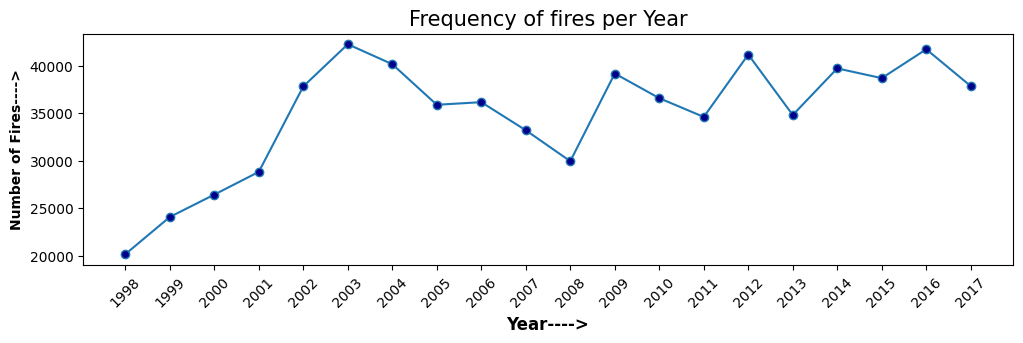

In [ ]:
# line plot on fires_year

plt.figure(figsize=(12,3))
plt.title('Frequency of fires per Year',fontsize = 15)

plt.plot(fires_year['year'],fires_year['no_of_fires'], marker = 'o',markerfacecolor='darkblue')
plt.xticks(np.arange(1998,2018), rotation = 45)
plt.xlabel('Year---->',fontsize=12,fontweight = 600)
plt.ylabel('Number of Fires---->',fontsize=10,fontweight = 600)
plt.show()

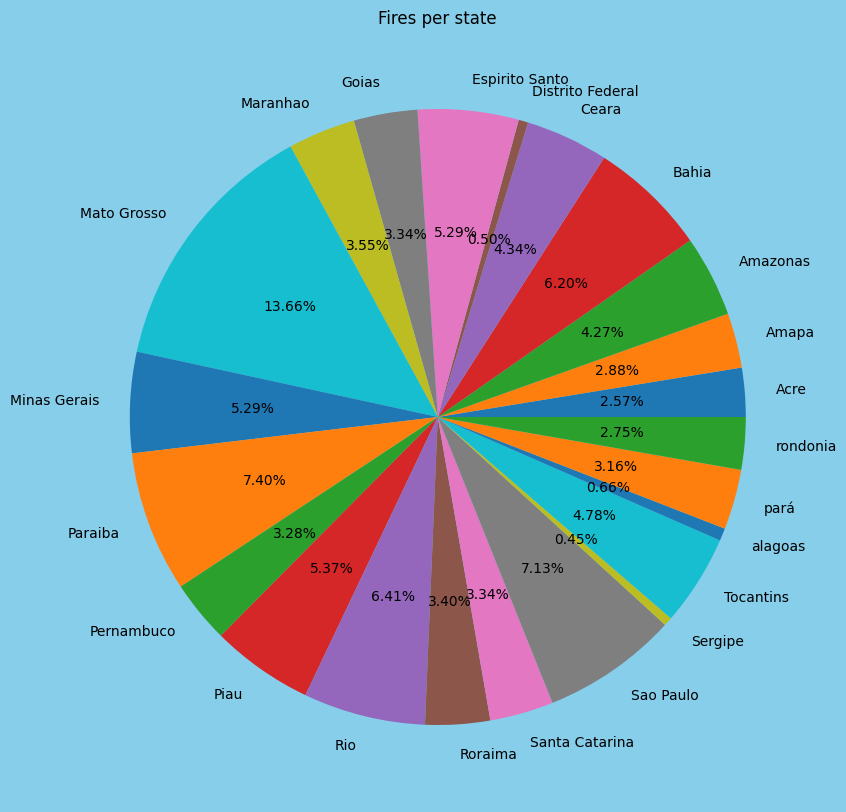

In [ ]:
# creating a pie chart for fires in each state

amzf['state'].value_counts()

fires_state = amzf.groupby('state')['no_of_fires'].sum().reset_index()
fires_state

plt.figure(figsize=(10,10),facecolor='skyblue')

plt.pie(fires_state['no_of_fires'],labels=fires_state['state'],autopct='%0.2f%%')
plt.title('Fires per state')

plt.show()

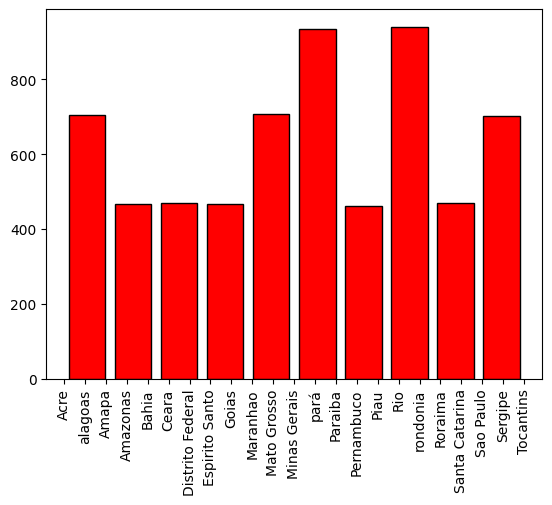

In [ ]:
plt.hist(amzf['state'],edgecolor='black',rwidth=0.8, color = 'red')
plt.xticks(rotation=90)

plt.show()

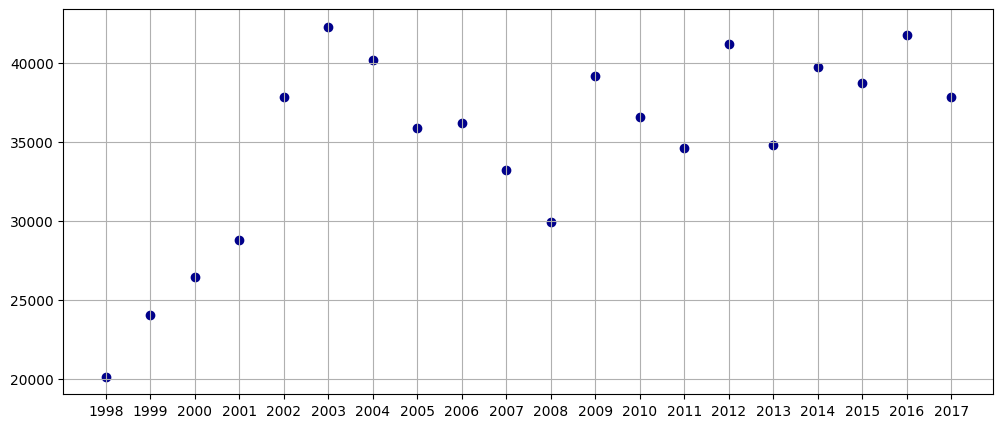

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(fires_year['year'],fires_year['no_of_fires'], color = 'darkblue')
plt.xticks(np.arange(1998,2018))
plt.grid()
plt.show()

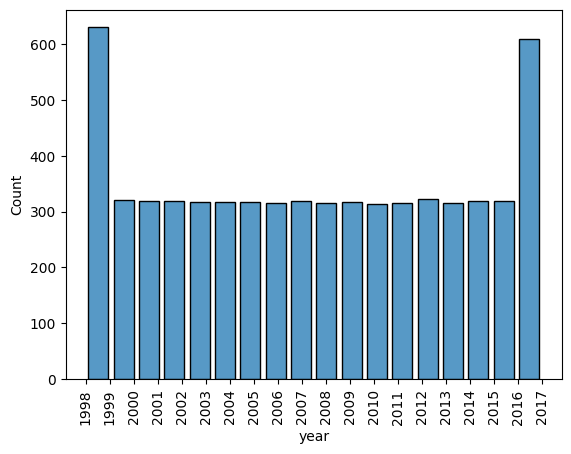

In [ ]:
sns.histplot(x= amzf['year'],data = amzf,shrink=0.8) # occurence of each year in the data set.
plt.xticks(np.arange(1998,2018),rotation=90)
plt.show()

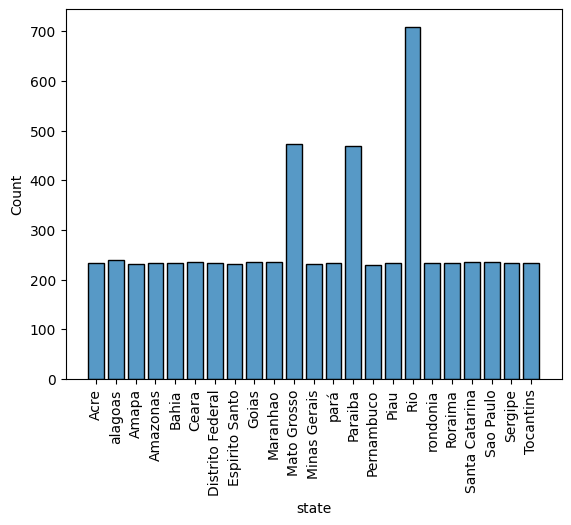

In [ ]:
sns.histplot(x= amzf['state'],data = amzf,shrink=0.8) # occurence of each state in the data-set.
plt.xticks(rotation=90)
plt.show()

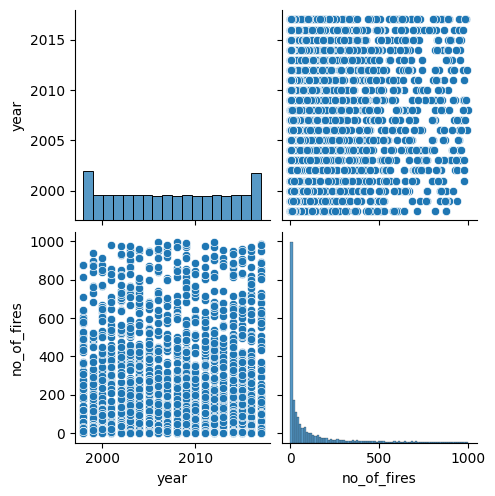

In [ ]:
sns.pairplot(amzf) # it takes all the numeric columns and makes a NxN grid. N=no. of numeric columns

<Axes: >

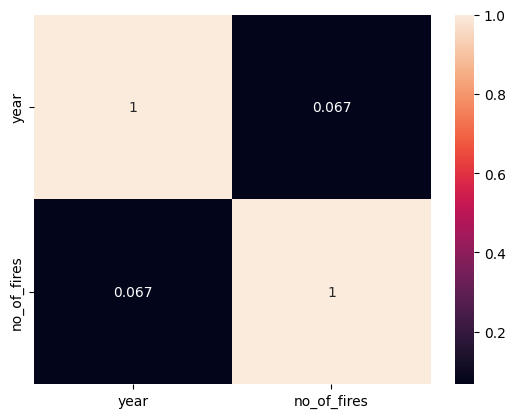

In [ ]:
corr_mat = amzf.corr(numeric_only=True)
corr_mat

sns.heatmap(corr_mat,annot =True) # not effective as only 2 numeric columns are there

/tmp/ipython-input-1289069530.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_f_month, x='month', y='no_of_fires', order=month_order, palette='viridis')


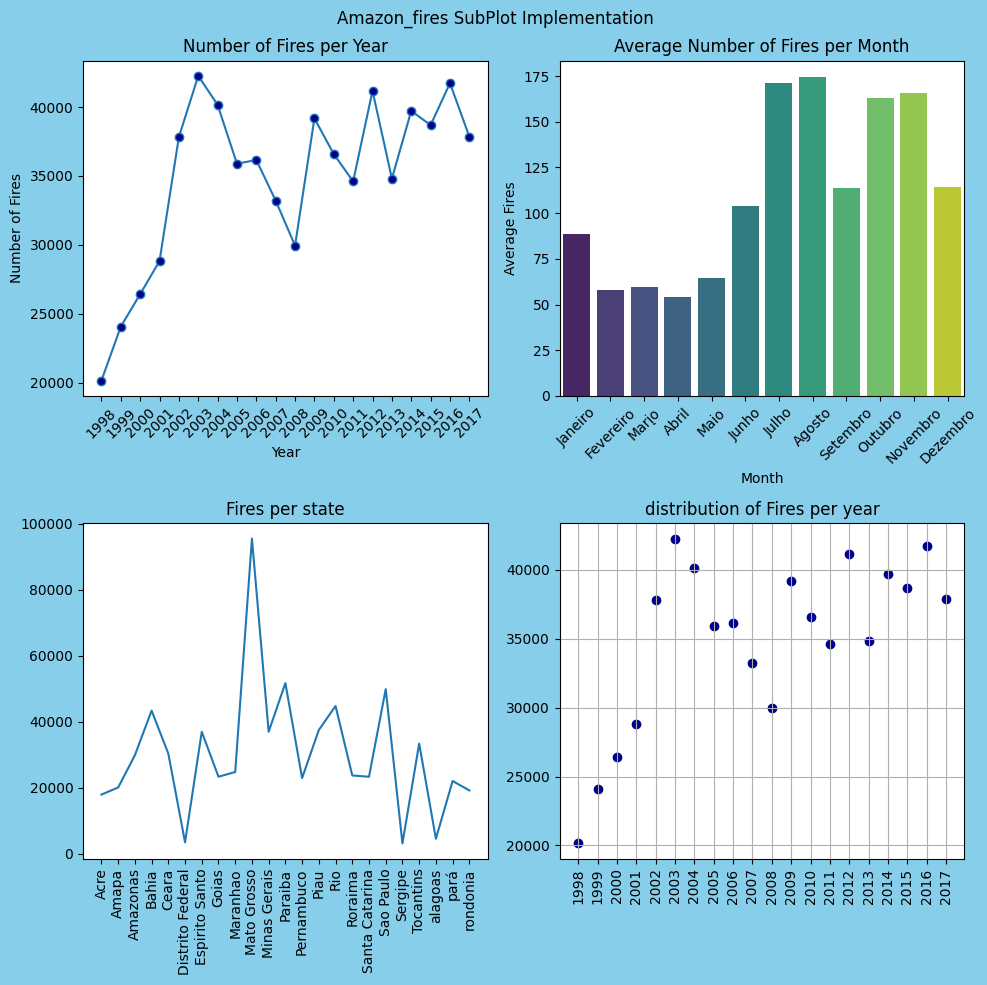

In [ ]:
plt.figure(figsize=(10,10),facecolor='skyblue')
plt.suptitle('Amazon_fires SubPlot Implementation')

plt.subplot(2,2,1)
plt.plot(fires_year['year'],fires_year['no_of_fires'], marker = 'o',markerfacecolor='darkblue')
plt.title('Number of Fires per Year')
plt.xticks(np.arange(1998,2018), rotation = 45)
plt.xlabel('Year')
plt.ylabel('Number of Fires')

plt.subplot(2,2,2)
avg_f_month = amzf.groupby('month')['no_of_fires'].mean().reset_index()
#  1. Define the correct chronological order for Portuguese months
month_order = [
    'Janeiro', 'Fevereiro', 'Marįo', 'Abril', 'Maio', 'Junho',
    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]
sns.barplot(data=avg_f_month, x='month', y='no_of_fires', order=month_order, palette='viridis')
plt.title('Average Number of Fires per Month')
plt.xlabel('Month')
plt.ylabel('Average Fires')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(fires_state['state'],fires_state['no_of_fires'])
plt.xticks(rotation=90)
plt.title('Fires per state')

plt.subplot(2,2,4)
plt.scatter(fires_year['year'],fires_year['no_of_fires'], color = 'darkblue')
plt.title('distribution of Fires per year')
plt.xticks(np.arange(1998,2018),rotation=90)
plt.grid()

plt.tight_layout()
plt.show()